In [3]:
%pylab inline

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


Populating the interactive namespace from numpy and matplotlib


In [51]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, learn_data, learn_labels):
        self.learn_data = learn_data
        self.learn_labels = learn_labels

    def predict(self, test_data):
        self.test_data = test_data
        distances = sqrt(sum((self.learn_data[:, newaxis] - self.test_data)**2, -1).T)
        k_nearest = argsort(distances, 1)[:, 0:self.k]
        k_nearest_labels = self.learn_labels[k_nearest]
        self.predictions = stats.mode(k_nearest_labels,1)[0].reshape(-1)
        return self.predictions

    def plot_pred(self, p = 50):
        self.plot_real(self.predictions)
        
    def plot_real(self, test_labels, p=50):
        plot_predictions(self.learn_data, self.learn_labels, self.test_data, test_labels, p)
        
    def accuracy(self, test_labels):
        return accuracy(self.predictions, test_labels)

def plot_predictions(learn_data, learn_labels, test_data, test_labels, p=50):
        colors = array(['r', 'g', 'b', 'y', 's'])
        scatter(learn_data[:,0],learn_data[:,1], c=colors[learn_labels])
        scatter(test_data[:,0], test_data[:,1], c=colors[test_labels], s=p)
        show()
        
def accuracy(predictions, real_labels):
     return 'accuracy: ' + str(sum(real_labels == predictions)*100/len(predictions)) + '%'
    
def divide_data(data, labels):
    zipped = zip(data, labels)
    random.shuffle(zipped)
    inzipped = zip(*zipped)
    
    learn_size = 2*data.shape[0]/3
    learn_data = array(inzipped[0])[:learn_size]
    learn_labels = array(inzipped[1])[:learn_size]
    test_data = array(inzipped[0])[learn_size:]
    test_labels = array(inzipped[1])[learn_size:]
    return learn_data, learn_labels, test_data, test_labels

def cross_valid(cls, data, labels, p=10):
    labels = labels.reshape(len(labels), 1)
    print data.shape, labels.shape
    d_l = hstack((data, labels))
    f = data.shape[1]
    random.shuffle(d_l)
    data = array(split(d_l[:, :f], p))
    labels = array(split(d_l[:, f].flatten(), p))

    print data.shape, labels.shape
    count = 0
    for i in arange(p):
        learn_data = (data[arange(p)!=i]).reshape(-1, f)
        learn_labels = (labels[arange(p)!=i]).flatten()
        test_data = data[i]
        test_labels = labels[i]
        knn.fit(learn_data, learn_labels)
        count = count + (knn.predict(test_data) != test_labels).sum()
    return count
    
knn = KNN(5)
X1 = array([[i, i] for i in arange(5)])
knn.fit(X1, array([5,4,5,2,5]))
print knn.predict(X1)
print knn.accuracy(array([5,4,5,2,5]))

[5 5 5 5 5]
accuracy: 60%


In [15]:
# wczytanie zestawu danych z pliku
t_data = pd.read_csv("../DataSets/titanic.csv")
t_data = t_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
t_data = t_data.dropna()
t_data['Sex'] = pd.Categorical.from_array(t_data['Sex']).codes
t_data['Embarked'] = pd.Categorical.from_array(t_data['Embarked']).codes

t_labels = t_data['Survived'].get_values()
t_data = t_data.drop('Survived', axis = 1).get_values()

t_learn_data, t_learn_labels, t_test_data, t_test_labels = divide_data(t_data, t_labels)

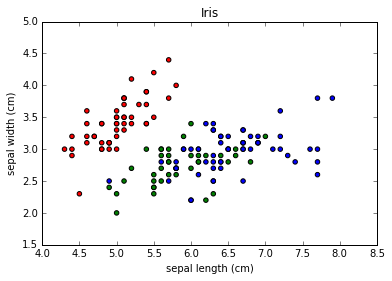

In [16]:
from sklearn import datasets 
iris = datasets.load_iris() 
p = scatter(iris.data[:,0], iris.data[:,1], c=array(['r', 'g', 'b', 'y', 's'])[iris.target])
xlabel('sepal length (cm)')
ylabel('sepal width (cm)')
title('Iris')

i_learn_data, i_learn_labels, i_test_data, i_test_labels = divide_data(iris.data, iris.target)

accuracy: 98%


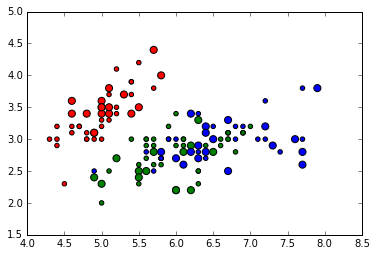

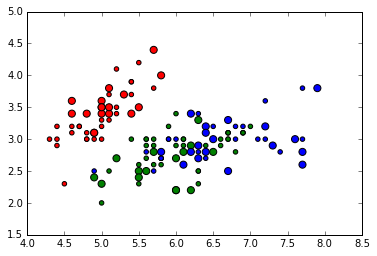

(150, 4) (150, 1)
(10, 15, 4) (10, 15)


5

In [52]:
knn = KNN(5)
knn.fit(i_learn_data, i_learn_labels)
knn.predict(i_test_data)
print knn.accuracy(i_test_labels)
knn.plot_pred()
knn.plot_real(i_test_labels)

cross_valid(knn, iris.data, iris.target)

accuracy: 96%


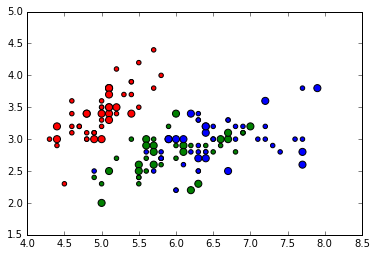

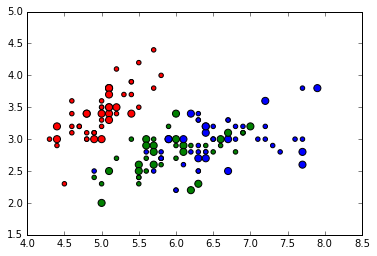

In [292]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(i_learn_data, i_learn_labels)
predictions = rfc.predict(i_test_data)
print accuracy(predictions, i_test_labels)

plot_predictions(i_learn_data, i_learn_labels, i_test_data, i_test_labels)
plot_predictions(i_learn_data, i_learn_labels, i_test_data, predictions)

accuracy: 98%


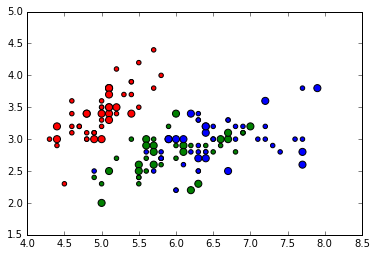

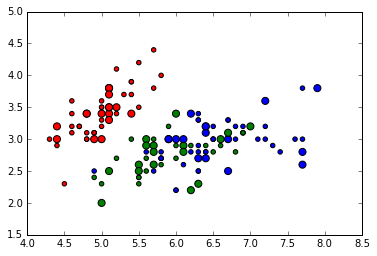

In [294]:
etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
etc.fit(i_learn_data, i_learn_labels)
predictions = etc.predict(i_test_data)
print accuracy(predictions, i_test_labels)

plot_predictions(i_learn_data, i_learn_labels, i_test_data, i_test_labels)
plot_predictions(i_learn_data, i_learn_labels, i_test_data, predictions)

In [335]:
# Cale to trzewoo urzywa wskaznika giniego

print 'Titanic: '

etc = ExtraTreesClassifier(n_estimators=15, max_depth=None, min_samples_split=5, random_state=4)
etc.fit(t_learn_data, t_learn_labels)
predictions = etc.predict(t_test_data)
print 'ETC: ', accuracy(predictions, t_test_labels)

knn = KNN(3)
knn.fit(t_learn_data, t_learn_labels)
predictions = knn.predict(t_test_data)
print 'KNN: ', accuracy(predictions, t_test_labels)

rfc = RandomForestClassifier(n_estimators=15, max_depth=None, min_samples_split=5, random_state=8)
rfc.fit(t_learn_data, t_learn_labels)
predictions = rfc.predict(t_test_data)
print 'RFC: ', accuracy(predictions, t_test_labels)

Titanic: 
ETC:  accuracy: 76%
KNN:  accuracy: 69%
RFC:  accuracy: 80%


In [390]:
def convert(data):
    for c in arange(len(data[0])):
        column = data[:, c]
        uniq = unique(column)
        for i in range(len(uniq)):
            column[column == uniq[i]] = i 

d_type = [('class', 'S1'), ('cap-shape', 'S1'), ('cap-surface', 'S1'), ('cap-colour', 'S1'), ('bruise', 'S1'),
          ('odor', 'S1'), ('attchmnt', 'S1'), ('spacing', 'S1'), ('size', 'S1'), ('colour', 'S1'), ('shape', 'S1'), 
          ('root', 'S1'), ('sAbv', 'S1'), ('sBelw', 'S1'), ('cAbv', 'S1'), ('cBelw', 'S1'), ('vType', 'S1'), 
          ('vColour', 'S1'), ('rNumber', 'S1'), ('rType', 'S1'), ('sColour', 'S1'), ('pop', 'S1'), ('habitat', 'S1')]

m_data = pd.DataFrame(loadtxt('../DataSets/mushrooms/Dataset.data', skiprows=1, dtype=d_type))

convert(m_data.get_values())
print m_data.head()

m_labels = m_data['class'].get_values()
m_data = m_data.drop('class', axis = 1).get_values()

m_learn_data, m_learn_labels, m_test_data, m_test_labels = divide_data(m_data, m_labels)

  class cap-shape cap-surface cap-colour bruise odor attchmnt spacing size  \
0     1         2           3          4      0    8        1       0    1   
1     1         5           2          0      1    2        1       0    0   
2     0         5           3          4      1    0        1       0    0   
3     0         5           3          4      1    5        1       0    0   
4     0         3           2          4      0    5        0       0    0   

  colour   ...   sBelw cAbv cBelw vType vColour rNumber rType sColour pop  \
0      0   ...       2    7     7     0       2       1     0       7   4   
1      3   ...       2    7     7     0       2       1     4       1   3   
2     10   ...       3    7     7     0       2       1     4       2   5   
3     10   ...       2    3     3     0       2       1     4       2   4   
4     11   ...       2    5     5     0       1       1     4       3   1   

  habitat  
0       4  
1       5  
2       4  
3       0  
4       

In [400]:
dtc = tree.DecisionTreeClassifier()
dtc = t.fit(m_learn_data, m_learn_labels)

print m_test_data.shape

predictions = dtc.predict(m_test_data)
print 'RFC: ', accuracy(predictions, m_test_labels)

(2708, 22)
RFC:  accuracy: 100%


In [530]:
def convert(data, fields=None, columns=None):
    for c in arange(len(data.columns)):
        if columns != None and not(data.columns[c] in columns):
            continue
        column = data[data.columns[c]].get_values()
        if fields == None:
            uniq = unique(column)
        else:
            uniq = fields[c]
        for i in range(len(uniq)):
            column[column == uniq[i]] = i 

c_data = pd.read_csv("../DataSets/car.dat")
print c_data.columns
convert(c_data, fields = [['vhigh', 'high', 'low', 'med'],
                                        ['vhigh', 'high', 'low', 'med'],
                                        ['2', '3', '4', '5more'],
                                        ['2', '4', 'more'],
                                        ['small', 'med', 'big'],
                                        ['low', 'med', 'high'],
                                        ['unacc', 'acc', 'good', 'vgood']])
print c_data.head()

c_labels = c_data['Acceptability'].get_values()
c_data = c_data.drop('Acceptability', axis = 1).get_values()

c_learn_data, c_learn_labels, c_test_data, c_test_labels = divide_data(c_data, c_labels)

Index([u'Buying', u'Maint', u'Doors', u'Persons', u'Lug_boot', u'Safety',
       u'Acceptability'],
      dtype='object')
  Buying Maint Doors Persons Lug_boot Safety Acceptability
0      0     0     0       0        0      0             0
1      0     0     0       0        0      1             0
2      0     0     0       0        0      2             0
3      0     0     0       0        1      0             0
4      0     0     0       0        1      1             0


In [435]:
dtc = tree.DecisionTreeClassifier()
dtc = t.fit(c_learn_data, c_learn_labels)

print c_test_data.shape

predictions = dtc.predict(c_test_data)
print 'RFC: ', accuracy(predictions, c_test_labels)

(576, 6)
RFC:  accuracy: 97%


In [626]:
b_data = pd.read_csv("../DataSets/bank.csv")
b_data = b_data.drop(['day', 'month'], axis=1)
convert(b_data, columns=array(['marital', 'loan', 'housing', 'job', 'education', 'default', 'contact',
                     'day', 'month', 'poutcome']))
print b_data.head()
b_labels = b_data['Term deposit?'].get_values()
b_data = b_data.drop('Term deposit?', axis = 1).get_values()

b_learn_data, b_learn_labels, b_test_data, b_test_labels = divide_data(b_data, b_labels)

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


   age job marital education default  balance housing loan contact  day month  \
0   58   4       1         2       0     2143       1    0       2    4     8   
1   44   9       2         1       0       29       1    0       2    4     8   
2   33   2       1         1       0        2       1    1       2    4     8   
3   47   1       1         3       0     1506       1    0       2    4     8   
4   33  11       2         3       0        1       0    0       2    4     8   

   duration  campaign  pdays  previous Term deposit?  
0       261         1     -1         0            no  
1       151         1     -1         0            no  
2        76         1     -1         0            no  
3        92         1     -1         0            no  
4       198         1     -1         0            no  


In [627]:
etc = ExtraTreesClassifier(n_estimators=15, max_depth=None, min_samples_split=5, random_state=4)
etc.fit(b_learn_data, b_learn_labels)

print b_test_data.shape

predictions = etc.predict(b_test_data)
print (predictions == 'no').sum(), (predictions == 'yes').sum()
print (b_test_labels == 'no').sum(), (b_test_labels == 'yes').sum()
print (predictions == b_test_labels).sum()
print 'DTC: ', accuracy(predictions, b_test_labels)

(15071, 15)
14291 780
13306 1765
13488
DTC:  accuracy: 89%
